In [3]:
#smote oversampling


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import  metrics, model_selection

In [5]:
data = pd.read_csv('cleaned_data.csv')
data = data.iloc[:,1:]

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score
x_train,x_test,y_train,y_test = train_test_split(data.iloc[:,:-1], data["target"] ,test_size=0.3, random_state= 42)

In [7]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_smote, y_smote = sm.fit_resample(x_train, y_train)

In [8]:
y_smote.value_counts()

0    9295
1    9295
Name: target, dtype: int64

In [11]:
from numpy import mean
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression(solver='liblinear')
model.fit(X_smote, y_smote)

LogisticRegression(solver='liblinear')

accuracy: 0.785529854760624
f1_socre: 0.7997589272261564
recall: 0.8565895642818719
[[6641 2654]
 [1333 7962]]
accuracy: 0.7113333333333334
f1_socre: 0.386974988201982
recall: 0.780952380952381
[[2791 1184]
 [ 115  410]]


C:\Users\docto\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


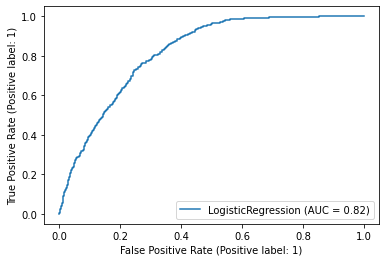

In [13]:
y_pred_train = model.predict(X_smote)

print("accuracy: {}".format(accuracy_score(y_smote, y_pred_train)))
print("f1_socre: {}".format(f1_score(y_smote, y_pred_train)))
print("recall: {}".format(recall_score(y_smote, y_pred_train)))
print(confusion_matrix(y_smote, y_pred_train))

y_pred_test = model.predict(x_test)

print("accuracy: {}".format(accuracy_score(y_test, y_pred_test)))
print("f1_socre: {}".format(f1_score(y_test, y_pred_test)))
print("recall: {}".format(recall_score(y_test, y_pred_test)))
print(confusion_matrix(y_test, y_pred_test))
metrics.plot_roc_curve(model, x_test, y_test)

In [14]:
model = DecisionTreeClassifier(max_depth = 7 #,min_samples_leaf=60 #, class_weight={0:9,1:1}
                              )
model.fit(X_smote, y_smote)

DecisionTreeClassifier(max_depth=7)

accuracy: 0.8454007530930607
f1_socre: 0.8563861682990206
recall: 0.9218934911242603
[[7147 2148]
 [ 726 8569]]
accuracy: 0.7506666666666667
f1_socre: 0.3868852459016394
recall: 0.6742857142857143
[[3024  951]
 [ 171  354]]


C:\Users\docto\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


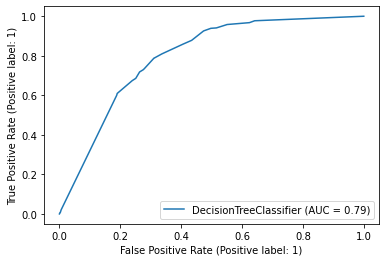

In [15]:
y_pred_train = model.predict(X_smote)

print("accuracy: {}".format(accuracy_score(y_smote, y_pred_train)))
print("f1_socre: {}".format(f1_score(y_smote, y_pred_train)))
print("recall: {}".format(recall_score(y_smote, y_pred_train)))
print(confusion_matrix(y_smote, y_pred_train))

y_pred_test = model.predict(x_test)

print("accuracy: {}".format(accuracy_score(y_test, y_pred_test)))
print("f1_socre: {}".format(f1_score(y_test, y_pred_test)))
print("recall: {}".format(recall_score(y_test, y_pred_test)))
print(confusion_matrix(y_test, y_pred_test))
metrics.plot_roc_curve(model, x_test, y_test)